# Validación de modelos

Al entrenar y evaluar modelos de ML, uno de los aspectos más importantes es **validar** correctamente para estimar de forma fiable cómo se comportará el modelo con datos nuevos (no vistos). 

Aunque la forma más básica es la separación de datos en *train* y *test* (train_test_split), existen diferentes técnicas de validación más sofisticadas que se utilizan para maximizar el uso de los datos disponibles y obtener una estimación más estable del desempeño del modelo.

La **validación cruzada** en Scikit-learn es una técnica que se utiliza para evaluar el desempeño de un modelo predictivo, dividiendo los datos en conjuntos de entrenamiento y prueba múltiples veces de manera sistemática. Esto permite obtener una estimación más confiable y robusta del rendimiento del modelo que simplemente dividir los datos una sola vez.

**Métodos para realizar validación de modelos**

1. train_test_split
2. cross_val_score
3. cross_validate
4. cross_val_predict
5. make_scorer

No devuelve un modelo entrenado, devuelve los resultados de entrenar y validar múltiples veces, para que podamos evaluar un modelo de forma más fiable que con un solo train test.

**Clases para realizar distintos tipos de validación cruzada**

1. KFold
2. StratifiedKFold
3. LeaveOneOut
4. RepeatedStratifiedKFold
5. GroupKFold
6. TimeSeriesSplit

In [1]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import seaborn as sns

X, y = load_iris(return_X_y=True) # Clasificación multiclase, predecir la columna "y"
model = LogisticRegression(max_iter=500)

results = cross_val_score(model, X, y, scoring="accuracy") # Por defecto cv=5
print("results", results)
print("accuracy media", results.mean())
print("accuracy std", results.std())
# sns.boxplot(results); # No es necesario pintarlo, pero permite visualizar un poco mejor los resultados

results [0.96666667 1.         0.93333333 0.96666667 1.        ]
accuracy media 0.9733333333333334
accuracy std 0.02494438257849294


In [2]:
# creando manualmente el KFold
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

results = cross_val_score(model, X, y, scoring="accuracy", cv=kfold) # Entrena y valida 10 veces de forma independiente 
print("results", results)
print("accuracy media", results.mean())
print("accuracy std", results.std())

results [1.         1.         1.         1.         1.         0.86666667
 0.93333333 1.         1.         0.93333333]
accuracy media 0.9733333333333334
accuracy std 0.04422166387140532


In [3]:
from sklearn.model_selection import StratifiedKFold

X, y = load_iris(return_X_y=True) # Clasificación multiclase, predecir la columna "y"
model = LogisticRegression(max_iter=500)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

results = cross_val_score(model, X, y, scoring="accuracy", cv=kfold) 
print("results", results)
print("accuracy media", results.mean())
print("accuracy std", results.std())

results [1.         1.         1.         0.93333333 0.93333333 0.93333333
 1.         1.         0.93333333 0.93333333]
accuracy media 0.9666666666666668
accuracy std 0.033333333333333326


## Leave One Out (LOO-CV)

Caso extremo de KFold donde k es igual al número total de muestras:

* Se deja solo una muestra para validación y se entrena con todas las demás.
* Se repite para cada muestra o fila del dataset, por lo que se obtienen n estimaciones de error.
* Se aprovechan los datos al máximo.
* Problema: coste computacional alto ya que entrena muchas más veces
* Ideal para datasets pequeños

In [4]:
from sklearn.model_selection import LeaveOneOut


X, y = load_iris(return_X_y=True) # Clasificación multiclase, predecir la columna "y"
model = LogisticRegression(max_iter=500)

kfold = LeaveOneOut()

results = cross_val_score(model, X, y, scoring="accuracy", cv=kfold) 
# print("results", results)
print("accuracy media", results.mean())
print("accuracy std", results.std())

accuracy media 0.9666666666666667
accuracy std 0.17950549357115014


## Múltiples métricas

Hacer validación cruzada con más de una métrica

Usamos cross_validate ya que es más sofisticado y permite trabajar con múltiples métricas.

In [5]:
from sklearn.metrics import get_scorer_names

print(sorted(get_scorer_names()))
# accuracy, precision_macro, recall_macro f1 o f1_macro, roc_auc_ovr

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'd2_absolute_error_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_max_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'neg_root_mean_squared_log_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples'

In [6]:
from sklearn.model_selection import cross_validate


X, y = load_iris(return_X_y=True) 
model = LogisticRegression(max_iter=500)

results = cross_validate(model, X, y,
    scoring=["accuracy", "precision_macro", "recall_macro", "f1_macro", "roc_auc_ovr"]
)

results
print("accuracy", results["test_accuracy"].mean()) 
print("precision", results["test_precision_macro"].mean()) 
print("recall", results["test_recall_macro"].mean()) 
print("f1", results["test_f1_macro"].mean()) 
print("AUC", results["test_roc_auc_ovr"].mean()) 

accuracy 0.9733333333333334
precision 0.9767676767676768
recall 0.9733333333333334
f1 0.973165236323131
AUC 0.9963333333333333


### Combinar train_test_split con validación cruzada

Si no se usa train_test_split, le solemos pasar X y completas a cross_val_score

Pero cuando usamos un train_test_split fuera, entonces lo habitual es pasarle X_train, y_train al cross_val_score que ya internamente este hace sus propios split de train y test y se evalua entonces la calidad toal de esos datos de entrenamiento.

Ya finalmente se prueba el modelo contra losdatos de test del train_test_split que son datos que nunca vio.

Prevenir data leakage ya que de esta forma el modelo no ve datos de test hasta el final del todo.

In [7]:
from sklearn.metrics import accuracy_score


X, y = load_iris(return_X_y=True) 
model = LogisticRegression(max_iter=500)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

results = cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy")

print("accuracy cv", results.mean())

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("accuracy test", accuracy_score(y_test, y_pred))

accuracy cv 0.95
accuracy test 1.0


### Validación cruzada con múltiples modelos

Bucle para probar todos los modelos con cross_validate probando múltiples métricas.

In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
df = pd.read_csv("../DATA/titanic_preprocesamiento.csv")
X = df.drop(columns=["Survived"])
y = df["Survived"]

models = {
    "LogisticRegression": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(),
    "DT": DecisionTreeClassifier(),
    "SVC": SVC(probability=True),
    "RandomForest": RandomForestClassifier()
}
df_list = []
for name, model in models.items():
    
    results = cross_validate(model, X, y, cv=5, scoring=["accuracy", "precision_macro", "recall_macro", "f1_macro", "roc_auc_ovr"])
    df_model = pd.DataFrame(results)
    df_model["modelo"] = name
    df_list.append(df_model)
    
df_resultados = pd.concat(df_list, ignore_index=True)
df_resultados

,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro,test_roc_auc_ovr,modelo
0,0.014475,0.005685,0.784091,0.773534,0.773534,0.773534,0.835026,LogisticRegression
1,0.014189,0.005393,0.822857,0.815035,0.809579,0.812030,0.858851,LogisticRegression
2,0.015412,0.006284,0.788571,0.777413,0.778862,0.778109,0.843870,LogisticRegression
3,0.013920,0.005015,0.794286,0.794842,0.764775,0.773512,0.867991,LogisticRegression
4,0.012754,0.005276,0.822857,0.816468,0.806899,0.810903,0.876168,LogisticRegression
5,0.001555,0.009778,0.721591,0.709088,0.693824,0.698198,0.759921,KNN
6,0.001530,0.009397,0.794286,0.787681,0.772815,0.778294,0.787521,KNN
7,0.002740,0.010921,0.771429,0.761133,0.751443,0.755245,0.835693,KNN
8,0.001736,0.011061,0.771429,0.762319,0.748763,0.753660,0.824835,KNN
9,0.001607,0.010883,0.822857,0.820573,0.801539,0.808446,0.838441,KNN


In [9]:
df_resultados.head(2)

,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro,test_roc_auc_ovr,modelo
0,0.014475,0.005685,0.784091,0.773534,0.773534,0.773534,0.835026,LogisticRegression
1,0.014189,0.005393,0.822857,0.815035,0.809579,0.812030,0.858851,LogisticRegression


In [10]:
# Muy importante esta gráfica
df_pivot = df_resultados.groupby("modelo").mean().sort_values("test_f1_macro", ascending=False)
df_pivot

,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro,test_roc_auc_ovr
modelo,,,,,,,
RandomForest,0.101183,0.013512,0.819643,0.813584,0.803922,0.807287,0.876326
LogisticRegression,0.014150,0.005531,0.802532,0.795459,0.786730,0.789618,0.856381
DT,0.002588,0.006386,0.787688,0.777377,0.776703,0.776526,0.779630
KNN,0.001834,0.010408,0.776318,0.768159,0.753677,0.758768,0.809282
SVC,0.045031,0.014290,0.696370,0.757081,0.620588,0.604430,0.822316


<Axes: ylabel='modelo'>

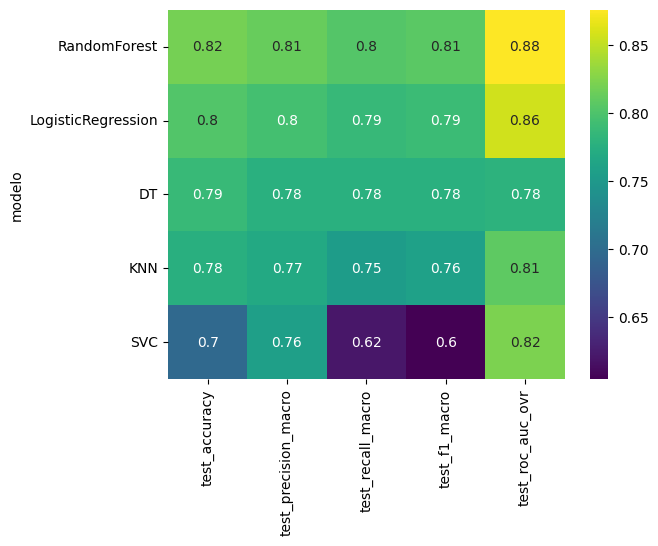

In [11]:
sns.heatmap(df_pivot.drop(columns=["fit_time","score_time"]), annot=True, cmap="viridis")

In [12]:
# Restructurar el dataframe para meter las columnas como filas
df_resultados_melt = df_resultados.melt(id_vars="modelo", var_name="matric", value_name="score")
df_resultados_melt.head(3)

,modelo,matric,score
0,LogisticRegression,fit_time,0.014475
1,LogisticRegression,fit_time,0.014189
2,LogisticRegression,fit_time,0.015412


In [13]:
# Dividir en dos dataframes, uno para times y otro para scores

df_resutlados_times = df_resultados[["modelo", "fit_time", "score_time"]]
df_resutlados_scores = df_resultados[["modelo", "test_accuracy", "test_precision_macro","test_recall_macro", "test_f1_macro", "test_roc_auc_ovr"]]

In [14]:
# DATAFRAMES DE TIMES
df_times = df_resutlados_times.melt(id_vars="modelo", var_name="time_type",value_name="time_seconds")
df_times.head(3)

,modelo,time_type,time_seconds
0,LogisticRegression,fit_time,0.014475
1,LogisticRegression,fit_time,0.014189
2,LogisticRegression,fit_time,0.015412


In [15]:
# DATAFRAMES DE SCORES
df_scores = df_resutlados_scores.melt(id_vars="modelo", var_name="metric",value_name="score")
df_scores.head(3)

,modelo,metric,score
0,LogisticRegression,test_accuracy,0.784091
1,LogisticRegression,test_accuracy,0.822857
2,LogisticRegression,test_accuracy,0.788571


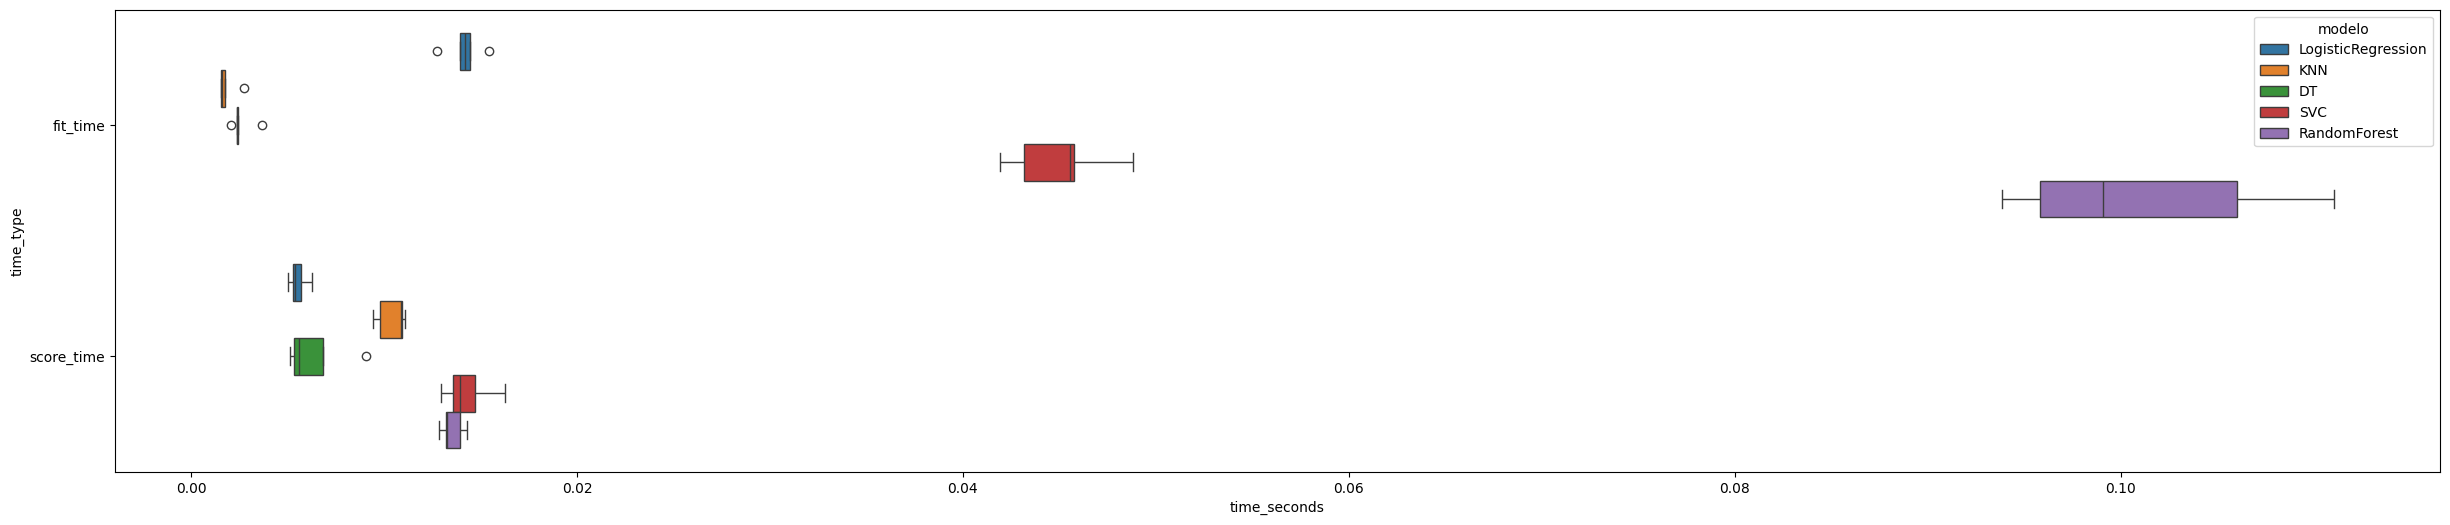

In [16]:
# BOXPLOT PARA TIMES
import matplotlib.pyplot as plt 
plt.figure(figsize=(30, 6))
sns.boxplot(df_times, x="time_seconds", y="time_type", hue="modelo");

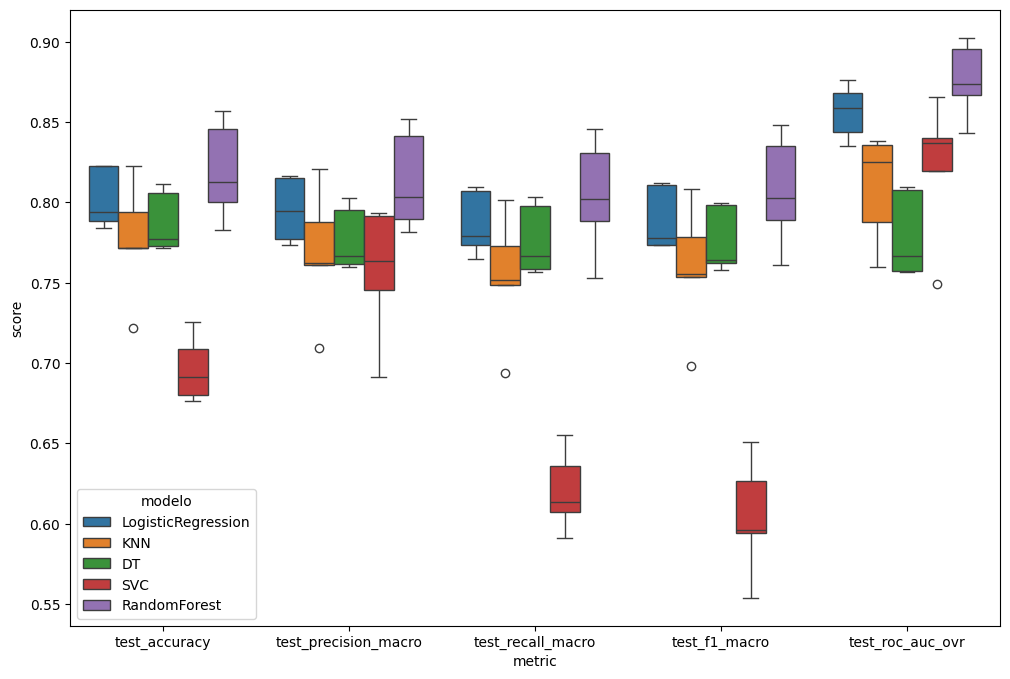

In [17]:
# BOXPLOT PARA SCORE
plt.figure(figsize=(12, 8))
sns.boxplot(df_scores, x="metric", y="score", hue="modelo");

Se observa que el RandomForest es el modelo con mejores resultados, se puede optar por entrenar ese modelo con todos los datos y exportarlo y desplegarlo a un sistema de producción utilizando MLOps, DevOps.

Nota: hay que tener en cuenta, que los modelos no se han optimizado sus parámetros, si los optimizamos podemos lograr mayor precisión anates de decidir entrenarlo finalmente.

Nota: a nivel de negocio hay que ver si el modelo cumple con los requisitos de tolerancia de error y precisión. como es un proceso iterativo, se sigue iterando mejorando los datos, preprocesados, modelados, evaluaciones.

### Validación cruzada regresión

Los scores en regresión algunos están negados para seguir la convención de que mayor es mejor y poder comparar R2 y MAE etc, todos bajo la premisa de mayor es mejor.

In [22]:
from sklearn.linear_model import LinearRegression

df = sns.load_dataset('mpg').dropna()
X = df[['horsepower', 'weight', 'cylinders', 'acceleration', 'model_year', 'displacement']]
y = df['mpg']
model = LinearRegression()
results = cross_validate(model, X, y, 
               scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_absolute_percentage_error', 'neg_root_mean_squared_error']
)
print('fit_time', results['fit_time'].mean())
print('score_time', results['score_time'].mean())
print('test_r2', results['test_r2'].mean())
print('test_neg_mean_absolute_error', results['test_neg_mean_absolute_error'].mean())
print('test_neg_mean_squared_error', results['test_neg_mean_squared_error'].mean())
print('test_neg_mean_absolute_percentage_error', results['test_neg_mean_absolute_percentage_error'].mean())
print('test_neg_root_mean_squared_error', results['test_neg_root_mean_squared_error'].mean())

fit_time 0.0018361568450927734
score_time 0.003863525390625
test_r2 0.5711581174835783
test_neg_mean_absolute_error -3.0956126221622062
test_neg_mean_squared_error -15.873427696602363
test_neg_mean_absolute_percentage_error -0.14720789973290122
test_neg_root_mean_squared_error -3.8590653291765387
